In [56]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [57]:
# Set dataset path
dataset_path = "../datasets"  # Change this to your dataset path

In [58]:
# Define dataset splits
data_splits = ["train", "valid", "test"]

In [59]:
# Define class names
class_names = ['Apple Scab Leaf', 'Apple leaf', 'Apple rust leaf', 'Bell_pepper leaf', 'Bell_pepper leaf spot', 'Blueberry leaf', 'Cherry leaf', 'Corn Gray leaf spot', 'Corn leaf blight', 'Corn rust leaf', 'Peach leaf', 'Potato leaf', 'Potato leaf early blight', 'Potato leaf late blight', 'Raspberry leaf', 'Soyabean leaf', 'Squash Powdery mildew leaf', 'Strawberry leaf', 'Tomato Early blight leaf', 'Tomato Septoria leaf spot', 'Tomato leaf', 'Tomato leaf bacterial spot', 'Tomato leaf late blight', 'Tomato leaf mosaic virus', 'Tomato leaf yellow virus', 'Tomato mold leaf', 'Tomato two spotted spider mites leaf', 'grape leaf', 'grape leaf black rot']

In [60]:
# Initialize statistics
class_counts = defaultdict(int)
bbox_sizes = []
bbox_data = []
image_counts = {}
label_counts = {}
missing_labels_count = {}

In [ ]:
# Process each split
for split in data_splits:
    images_path = os.path.join(dataset_path, split, "images")
    labels_path = os.path.join(dataset_path, split, "labels")
    image_files = glob.glob(os.path.join(images_path, "*.[jp][pn]g"))
    label_files = glob.glob(os.path.join(labels_path, "*.txt"))
    
    image_counts[split] = len(image_files)
    label_counts[split] = len(label_files)
    
    image_basenames = {os.path.splitext(os.path.basename(f))[0] for f in image_files}
    label_basenames = {os.path.splitext(os.path.basename(f))[0] for f in label_files}
    
    missing_labels = image_basenames - label_basenames  # Images with no corresponding labels
    num_missing = len(missing_labels)
    missing_labels_count[split] = num_missing
    
    for label_file in label_files:
        with open(label_file, "r") as f:
            lines = f.readlines()
            for line in lines:
                data = line.strip().split()
                if len(data) < 5:
                    continue
                class_id = int(data[0])
                x_center, y_center, width, height = map(float, data[1:])
                bbox_sizes.append((width, height))
                bbox_data.append([class_id, width, height])
                class_counts[class_id] += 1

In [62]:
# Convert to DataFrame
bbox_df = pd.DataFrame(bbox_data, columns=["class_id", "width", "height"])

In [63]:
# Summary statistics
print(f"Total Images: {sum(image_counts.values())}")
print(f"Total Labels: {sum(label_counts.values())}")
print(f"Images Missing Labels: {sum(missing_labels_count.values())}")
print("\nPer-Split Summary:")
for split in data_splits:
    print(f"{split.capitalize()} - Images: {image_counts[split]}, Labels: {label_counts[split]}, Missing Labels: {missing_labels_count[split]}")

Total Images: 2516
Total Labels: 2516
Images Missing Labels: 0

Per-Split Summary:
Train - Images: 2017, Labels: 2017, Missing Labels: 0
Valid - Images: 250, Labels: 250, Missing Labels: 0
Test - Images: 249, Labels: 249, Missing Labels: 0


C:\Users\harih\AppData\Local\Temp\ipykernel_10940\2554850632.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[class_names[i] if i < len(class_names) else f"Class {i}" for i in class_counts.keys()],


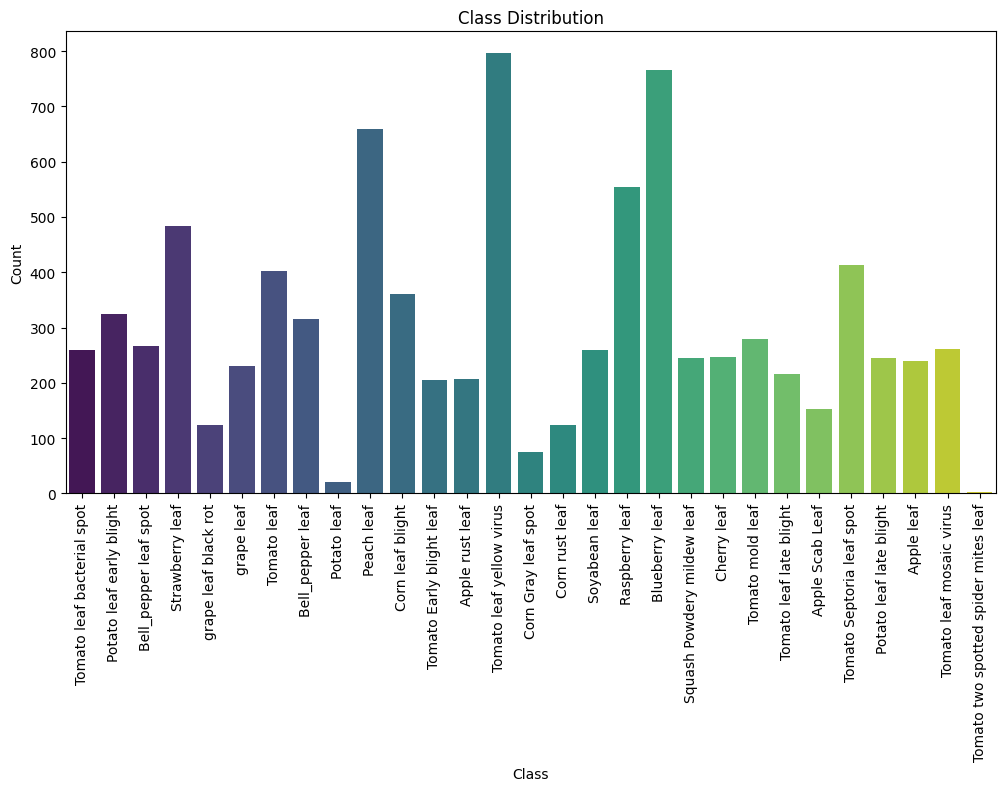

In [64]:
# Visualization: Class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=[class_names[i] if i < len(class_names) else f"Class {i}" for i in class_counts.keys()], 
            y=list(class_counts.values()), palette="viridis")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.xticks(rotation=90)
plt.show()